In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('all_data.csv')
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
df.isna().sum()
df.dropna(inplace=True)

In [4]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Ищем самые большие продажи по месяцам


In [5]:
df['Mounth']=df['Order Date'].str[0:2]
df=df[df['Order Date'].str[0:2]!='Or']


In [6]:
df['Mounth']=df['Mounth'].astype('int32')

In [63]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mounth,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38


In [8]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])


In [9]:
df['Sales']=df['Quantity Ordered']*df['Price Each']

In [10]:
numeric_columns = df.select_dtypes(include='number')

result = numeric_columns.groupby(df['Mounth']).sum()
result.drop('Mounth',axis=1).sort_values(by='Sales',ascending=False)

,Quantity Ordered,Price Each,Sales
Mounth,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


ищем самые большие продажи по городам(не мой способ)


In [11]:
df['City']=df['Purchase Address'].apply(lambda x: x.split(',')[1]+' ('+x.split(',')[2].split(' ')[1]+')') #пиздец гений...
df['City']

0                 Dallas (TX)
2                 Boston (MA)
3            Los Angeles (CA)
4            Los Angeles (CA)
5            Los Angeles (CA)
                 ...         
186845       Los Angeles (CA)
186846     San Francisco (CA)
186847     San Francisco (CA)
186848     San Francisco (CA)
186849     San Francisco (CA)
Name: City, Length: 185950, dtype: object

Ищем самые большие продажи по городам(мой способ)


In [12]:
df['City']=df['Purchase Address'].str.split(',')

In [13]:
arr_city=[]

for i,k in enumerate(df['City'].values):
    arr_city.append(k[1])

df['City']=arr_city


In [14]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns['City']=df['City']

result = numeric_columns.groupby(df['City']).sum()
result.drop(columns=['City','Mounth','Price Each'],axis=1).sort_values(by='Sales',ascending=False)



,Quantity Ordered,Sales
City,,
San Francisco,50239,8262203.91
Los Angeles,33289,5452570.80
New York City,27932,4664317.43
Boston,22528,3661642.01
Atlanta,16602,2795498.58
Dallas,16730,2767975.40
Seattle,16553,2747755.48
Portland,14053,2320490.61
Austin,11153,1819581.75


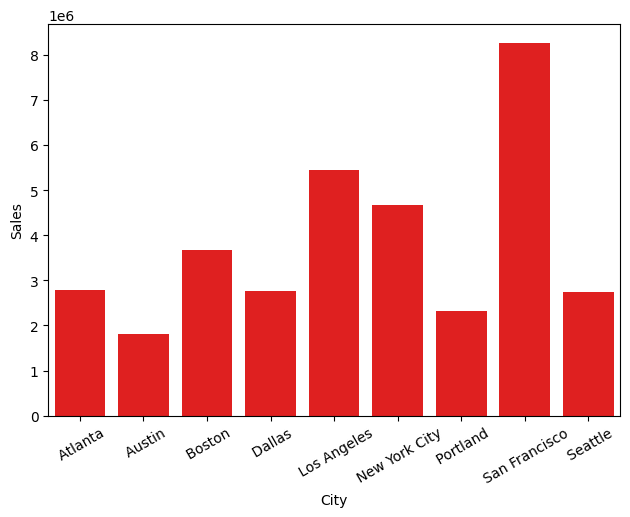

In [15]:
sns.barplot(result['Sales'],color='red')
plt.tight_layout()
plt.xticks(rotation=30,size=10)
plt.show()

теперь тут ебля со временем(типо самое лучшее время для того чтобы запостить рекламу)

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


C:\Users\vladt\AppData\Local\Temp\ipykernel_4980\506715213.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [64]:
df['Hour'] = df['Order Date'].dt.hour

0          8
2         22
3         14
4         14
5          9
          ..
186845    20
186846    16
186847     7
186848    17
186849     0
Name: Hour, Length: 185950, dtype: int32

In [18]:
df['Minute']=df['Order Date'].dt.minute

<Axes: xlabel='Hour', ylabel='Sales'>

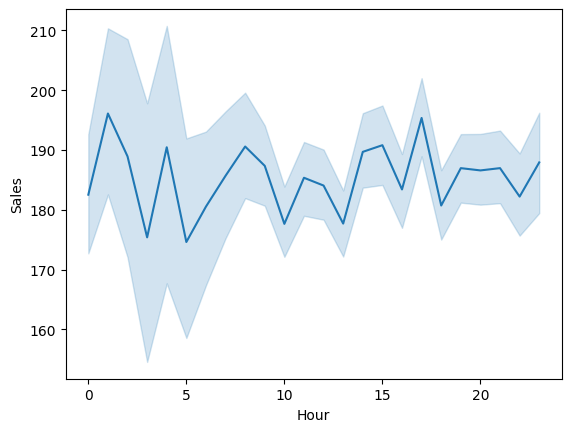

In [40]:
#тут типо строим график по времени и продажам и смотрим какое лучшее время


sns.lineplot(data=df,x='Hour',y='Sales')

КАКИЕ ПРОДУКТЫ ЧАЩЕ ВСЕГО ПРОДАЮТ ВМЕСТЕ(смотреть по order id)



In [20]:
df2=df[df['Order ID'].duplicated(keep=False)]

In [21]:
df2['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\vladt\AppData\Local\Temp\ipykernel_4980\3552263231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [22]:
df2=df2[['Order ID','Grouped']].drop_duplicates()

In [23]:
from itertools import combinations
from collections import Counter


In [24]:
count=Counter()

for row in df2['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2))) # 2 - количество элементов которые мы считам в одном массиве 


count.most_common(10) #пиздец...

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

КАКОЙ ПРОДУКТ ПРОДАВАЛСЯ БОЛЬШЕ ВСЕГО


In [59]:
products=df.groupby('Product')

final=products['Quantity Ordered'].sum()
final

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [61]:
final.index

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

<Axes: xlabel='Quantity Ordered', ylabel='Product'>

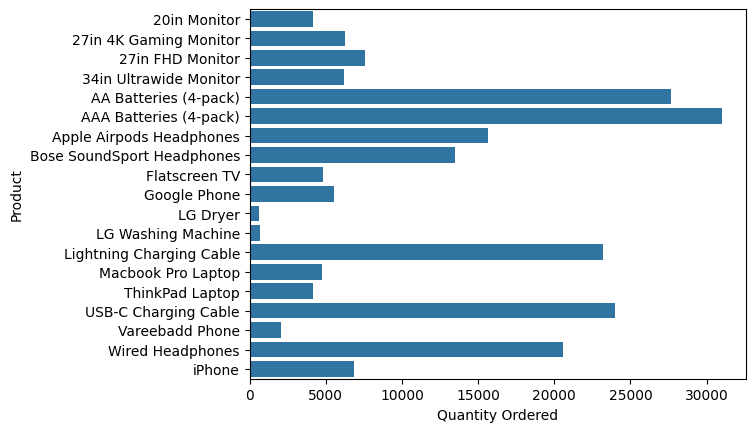

In [60]:
sns.barplot(x=final,y=final.index)


In [28]:
""" prices=df.groupby('Product').mean()['Price Each']
prices  потом здесь посчитать стоимость каждого товара по отдельности"""

" prices=df.groupby('Product').mean()['Price Each']\nprices  потом здесь посчитать стоимость каждого товара по отдельности"

In [29]:
#построить график на котором будут изображены сразу 2 графика
#по оси x-товары, по оси y количество заказнных товаров и их цена(посмотреть корреляцию)